# Advanced Plotting Methods

Topics covered:
- Introduce techniques for adding an extra data dimension to a plot with colour and symbols
- Discuss how colour impacts the way data are perceived and the readability of our plots
- Demonstrate some ways to finesse a plot

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

---
## Import data using Pandas

In [2]:
p3 = pd.read_csv('Data/P3.csv')
p3 = p3.rename(columns={'Value effective porosity (%)': 'EffectivePorosity_VolPercent'})

In [3]:
tvz = pd.read_excel('Data/TVZ.xlsx', sheet_name='Data')

---
## Adding Another Dimension with Colour Scales

We can add a third dimension to our x/y plots by applying a colour scale (colour map).

In [ ]:
# base example code

# legend

---
## Colour Scales: The Puzzling and the Perceptually Uniform

There is a dizzying array of colour scales to choose from. We must choose wisely or we risk distorting how our data are perceived. 

Refer to [this paper](https://www.nature.com/articles/s41467-020-19160-7) to get a feel for how data are distorted by colour. 

Explore how perception is distorted by colour scale selecting using [this application](https://github.com/mycarta/Colormap-distorsions-Panel-app#how-to-use-the-app) (Hint: click on 'launch app' and wait for binder to load).  

Matplotlib provides [a useful resource](https://matplotlib.org/stable/tutorials/colors/colormaps.html) that helps with colour scale selection. 

**Rule of thumb: Avoid rainbow and prefer perceptually uniform.**

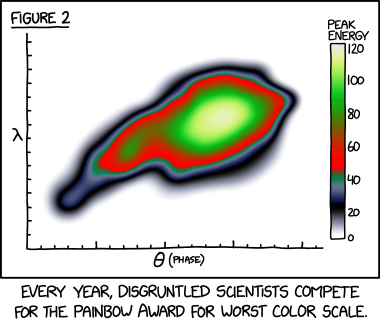

In [2]:
from IPython import display
display.Image("https://imgs.xkcd.com/comics/painbow_award.png")

---
## Advanced Scatter Plots with Seaborn

---
## Plot Element Layering

---
## Highlights and Fills

---
## Where to From Here

Illustrator or other graphics package for finishing 